# Problem Set 4

Tyler Amos

In [229]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
from collections import Counter
from numpy.linalg import matrix_power, eig

# a)

In [205]:
T = 500
sigma = 0.7
r = 0.85
mu = 11.4
unif_vec = sts.uniform.rvs(loc = 0, scale = 1, size = T,
                          random_state = 25)
eps_vec = sts.norm.ppf(unif_vec, loc = 0, scale = sigma)

def ar_1(t):
    if t == T: # end of recursive call
        return z_results
    else:
        # append z for t + 1
        z_results.append(r * z_results[t] + (1-r)*mu + eps_vec[t])
        # move on giving the index of the value we just appended
        return ar_1(t+1) # move ahead one step

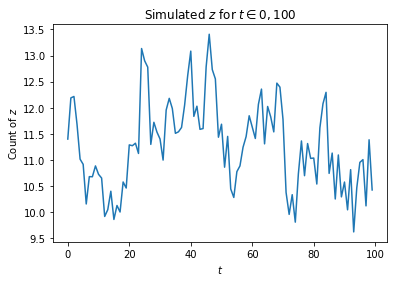

In [206]:
z_results  = [mu]# temporary results vector
res = ar_1(0)# results
plt.plot(res[:100])
plt.title("Simulated $z$ for $t \in {0, 100}$")
plt.xlabel("$t$")
plt.ylabel("Count of $z$");

# b)

In [207]:
std_z = np.std(res)
low = mu - 3*(std_z)
high = mu + 3*(std_z)
z_vals = np.linspace(low, high, 5)
print(z_vals)

[ 7.74294273  9.57147136 11.4        13.22852864 15.05705727]


# c)

In [208]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
print(z_cuts)

[ 8.65720705 10.48573568 12.31426432 14.14279295]


In [209]:

def get_bin(z, prev_bin):
    # assign the bin number
    if z <= z_cuts[0]:
        bin_ = 1
    if all([z_cuts[0] < z, z <= z_cuts[1]]):
        bin_ = 2
    if all([z_cuts[1] < z, z <= z_cuts[2]]):
        bin_ = 3
    if all([z_cuts[2] < z, z <= z_cuts[3]]):
        bin_ = 4
    if z > z_cuts[3]:
        bin_ = 5
    return (prev_bin, bin_) # (start, end)

def get_transitions():
    # count up the frequency of transitions
    transition_counter = Counter()
    start_counter = Counter() # keep track of starting points
    end_counter = Counter() # keep track of end points
    prev_bin = str(0) # start at 0, b/c this category is nonexistent
    for z in res:
        transition = get_bin(z, prev_bin)
        prev_bin = transition[1]
        transition_counter.update([transition])
        end_counter.update([transition[1]])
        start_counter.update([transition[0]])
    # cast all counters to dictionaries and return
    transition_counter = dict(transition_counter)
    start_counter = dict(start_counter)
    end_counter = dict(end_counter)
    return {"trans": transition_counter, 
               "start": start_counter,
               "end": end_counter}

In [210]:
bin_results = get_transitions()
transition_matrix = np.zeros( shape = (5,5))
# now populate the matrix with the appropriate values
for start in range(1,6):
    for end in range(1,6):
        try:
            # try to catch non-existent transitions
            # number of trips from this start to that end, divided by
            # number of trips from this start
            p = bin_results['trans'][(start, end)] / bin_results['start'][start]
        except KeyError:
            # if we don't have records, we just assign zero
            p = 0
        transition_matrix[start-1, end-1] = p

In [211]:
transition_matrix

array([[0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.04761905, 0.57142857, 0.37142857, 0.00952381, 0.        ],
       [0.        , 0.14590747, 0.72597865, 0.12811388, 0.        ],
       [0.        , 0.        , 0.3627451 , 0.60784314, 0.02941176],
       [0.        , 0.        , 0.        , 0.42857143, 0.57142857]])

# d)

In [228]:
t = np.array([0,0,1,0,0]).reshape(5,1)
est_probs = matrix_power(transition_matrix.T,3) @ t
print("The estimated probability of z at t + 3 being in bin 5" + 
      "\ngiven z at time t is in bin 3 is {}".format(est_probs[4][0]))


The estimated probability of z at t + 3 being in bin 5
given z at time t is in bin 3 is 0.007219959076806281


# e)

In [245]:
eigvals, eigvecmat = eig(transition_matrix.T) # get eigens
steady = eigvecmat[:, 1] / eigvecmat[:, 1].sum() # this is the only one with zero
print_message = "\n".join(["Bin {}: {}".format(i + 1, steady[i]) for i in range(len(steady))])
print("STEADY STATE\n{}".format(print_message))                  
                          

STEADY STATE
Bin 1: 0.010192440259668714
Bin 2: 0.2140412454530431
Bin 3: 0.5588440415545183
Bin 4: 0.20299148457561966
Bin 5: 0.013930788157150372


# f) 

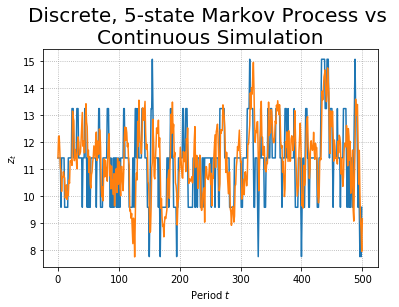

In [259]:
x_vec = np.zeros(T)
x_t = z_vals[2]
xt_ind = 1
for t_ind in range(T):
    # Calculate new index and new value
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(transition_matrix[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    
    # Update the current value and its index in the loop
    x_t = x_tp1
    xt_ind = xtp1_ind
    
z_results  = [mu]
res = ar_1(0)

plt.plot(x_vec)
plt.plot(res)
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title("Discrete, 5-state Markov Process vs \nContinuous Simulation", fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$z_t$');